In [1]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [56]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math

In [3]:
geometry = pd.read_csv('../AA_geometry.tsv', header=None, sep='\t')
arrayGeometry = geometry.to_numpy().transpose()

In [4]:
x = arrayGeometry[0]
y = arrayGeometry[1]
z = arrayGeometry[2]

# AA Geometry Top View

Text(0, 0.5, 'Y-axis')

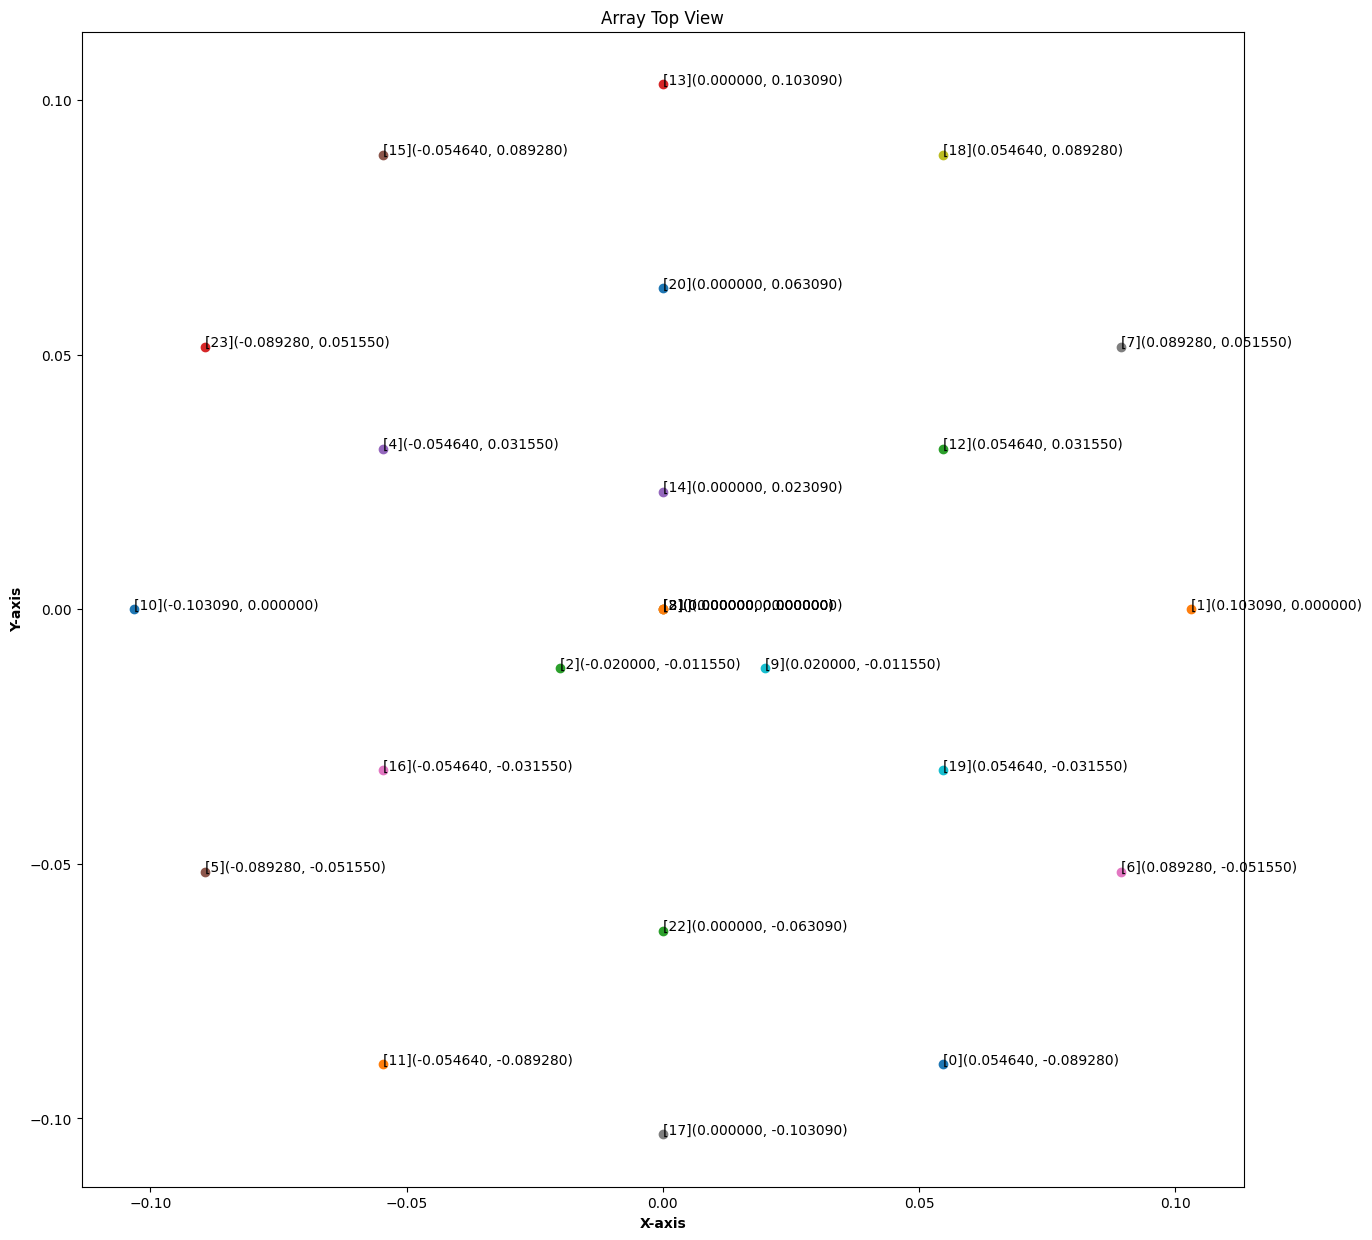

In [54]:
fig = plt.figure(figsize = (15,15))
ax = plt.axes()
for i in range(len(x)):
    ax.scatter(x[i],y[i])
    ax.text(x[i],y[i], '[%s](%f, %f)'%(str(i), x[i], y[i]))
plt.title("Array Top View")
ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 

# AA Geometry 3D View

Text(0.5, 0, 'Z-axis')

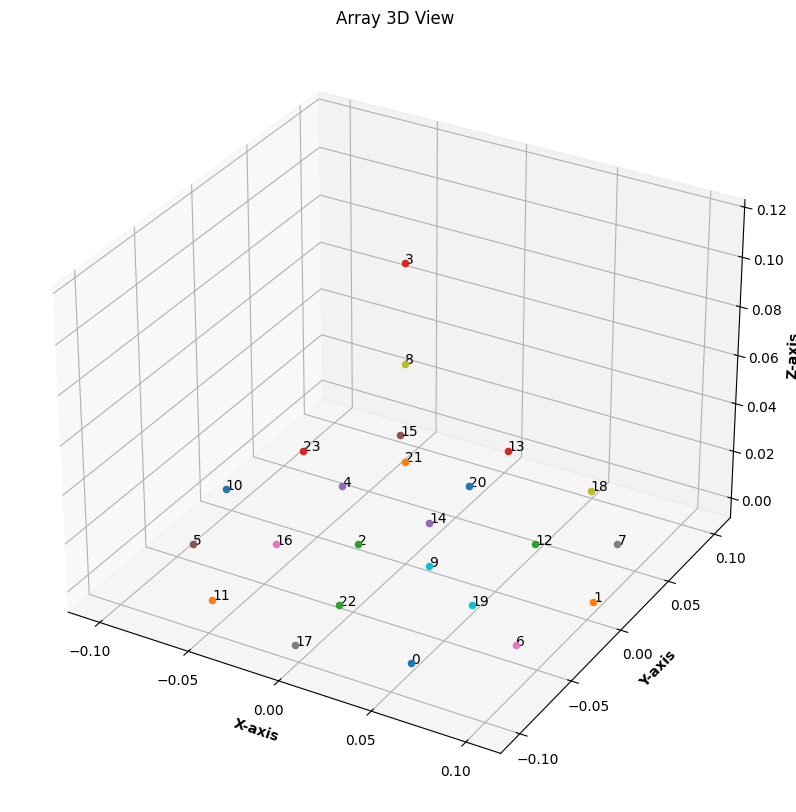

In [45]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = "3d")
for i in range(len(x)):
    ax.scatter(x[i],y[i],z[i])
    ax.text(x[i],y[i],z[i], '%s'%(str(i)))
plt.title("Array 3D View")
ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 
ax.set_zlabel('Z-axis', fontweight ='bold')

# Extract Data

In [6]:
path_dir = "../data/rss45/"
n_channels = 24

In [7]:
def key(x):
    return(x[26])

In [8]:
files_tau = [i for i in os.listdir(path_dir) if os.path.isfile(os.path.join(path_dir,i)) and \
         'tau.bin' in i]
files_tau = sorted(files_tau, key = key)   
files_tau

['random_signal_source_info_0_tau.bin',
 'random_signal_source_info_1_tau.bin',
 'random_signal_source_info_2_tau.bin',
 'random_signal_source_info_3_tau.bin',
 'random_signal_source_info_4_tau.bin']

In [9]:
taus = []
for file in files_tau:
    with open(path_dir+file, 'rb') as f:
        delay = f.read()
        delay = np.frombuffer(delay, dtype = np.float32)
        delay = np.resize(delay, (int(len(delay)/n_channels), n_channels))
        taus.append(delay)
taus_np = np.array(taus)
taus_np = taus_np.reshape(taus_np.shape[0]*taus_np.shape[1], taus_np.shape[2])

In [10]:
files_dat = [i for i in os.listdir(path_dir) if os.path.isfile(os.path.join(path_dir,i)) and \
         '.dat' in i]
files_dat = sorted(files_dat, key = key)   
files_dat

['random_signal_source_info_0.dat',
 'random_signal_source_info_1.dat',
 'random_signal_source_info_2.dat',
 'random_signal_source_info_3.dat',
 'random_signal_source_info_4.dat']

In [11]:
dats = []
for file in files_dat:
    with open(path_dir+file, 'r') as f:
        lines = f.readlines()
        for i,l in enumerate(lines):
            if (i>0):
                dat = [float(i) for i in l.split()]
                dats.append(dat)
dats_np = np.array(dats)
dats_np

array([[4.80e+04, 3.43e+02, 1.72e+01, 0.00e+00],
       [4.80e+04, 3.43e+02, 4.25e+01, 0.00e+00],
       [4.80e+04, 3.43e+02, 1.56e+01, 0.00e+00],
       ...,
       [4.80e+04, 3.43e+02, 2.06e+01, 0.00e+00],
       [4.80e+04, 3.43e+02, 3.80e+00, 0.00e+00],
       [4.80e+04, 3.43e+02, 2.50e+00, 0.00e+00]])

In [12]:
X_data = taus_np
Y_data = dats_np[:,2]

In [66]:
X_data[0]

array([2.1788749e-04, 5.9806334e-06, 3.5875218e-04, 2.9309330e-04,
       4.1806942e-04, 5.8618659e-04, 8.8884844e-05, 0.0000000e+00,
       2.9309330e-04, 2.4734944e-04, 5.8020593e-04, 5.2223972e-04,
       1.1371721e-04, 2.0421707e-04, 2.7318689e-04, 3.6829911e-04,
       4.7246937e-04, 3.8196953e-04, 6.3946878e-05, 1.6811716e-04,
       2.3870198e-04, 2.9309330e-04, 3.4748460e-04, 4.9730175e-04],
      dtype=float32)

Text(0, 0.5, 'Y-axis')

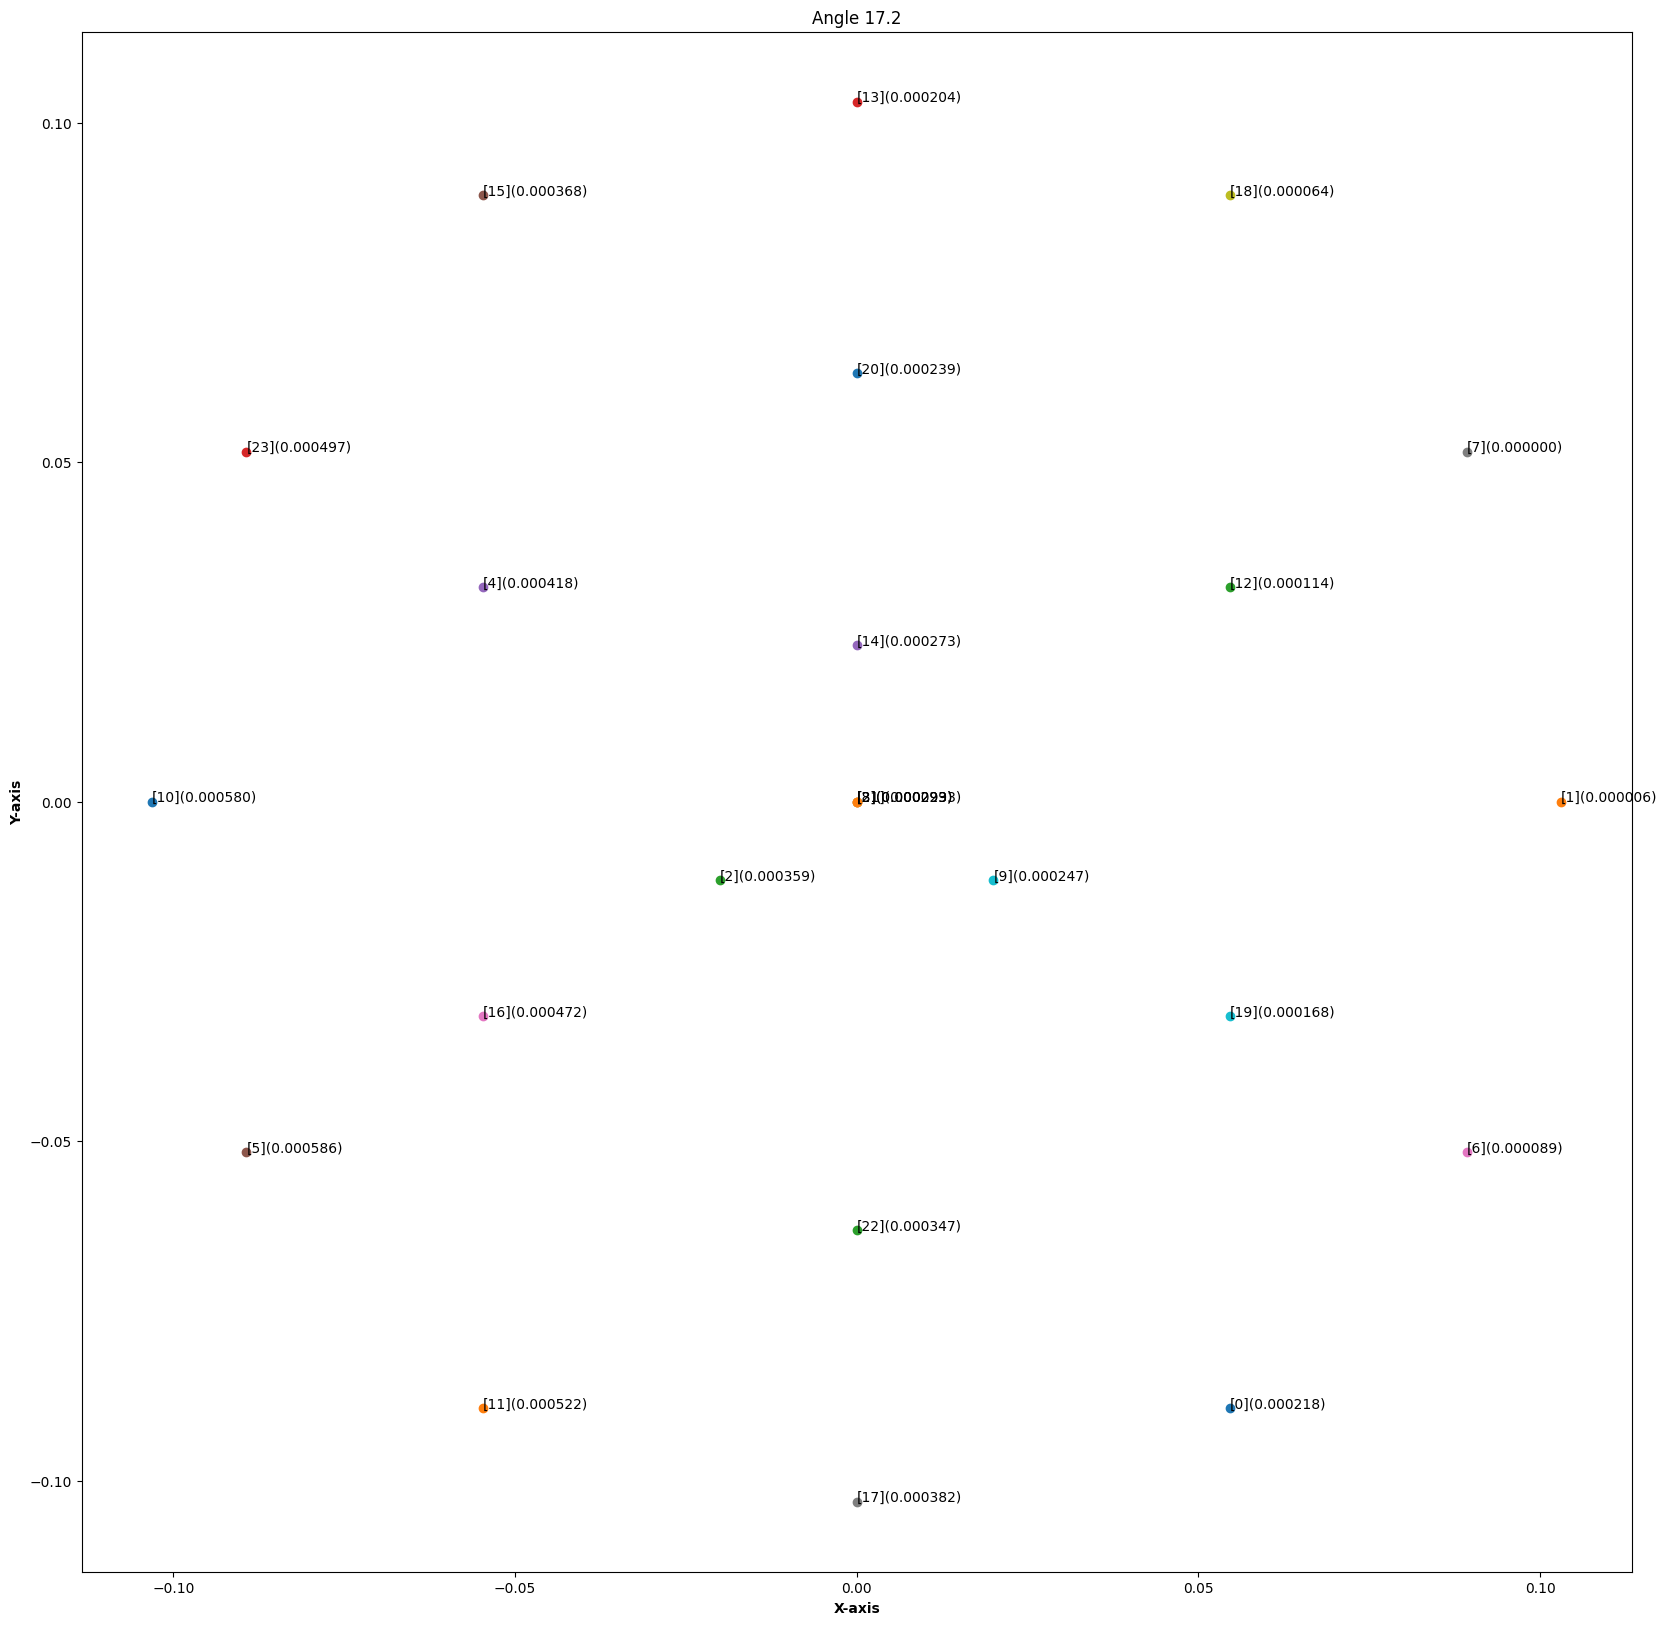

In [63]:
fig = plt.figure(figsize = (20,20))
ax = plt.axes()
for i in range(len(x)):
    ax.scatter(x[i],y[i])
    ax.text(x[i],y[i], '[%s](%f)'%(str(i), X_data[0,i]))
plt.title("Angle %s"%(str(Y_data[0])))
ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 
#ax.set_zlabel('Z-axis', fontweight ='bold')

In [74]:
for i in range(n_channels):
    t = math.sqrt((x[7] - x[i])**2 + (y[7]-y[i])**2) / 343
    print( '[%s] '%(str(i)), t, X_data[1,i])
    print("Diff: ", t-X_data[1,i])

[0]  0.0004228211293417438 0.0003518445
Diff:  7.097662e-05
[1]  0.0001555911586754117 7.1850955e-05
Diff:  8.3740204e-05
[2]  0.0003678987063499147 0.00035918195
Diff:  8.716743e-06
[3]  0.00030056486330339515 0.00029344257
Diff:  7.1222894e-06
[4]  0.0004236239527639102 0.00034874858
Diff:  7.487537e-05
[5]  0.0006011297266067903 0.00058688514
Diff:  1.4244579e-05
[6]  0.00030058309037900874 0.00020307102
Diff:  9.7512064e-05
[7]  0.0 0.0
Diff:  0.0
[8]  0.00030056486330339515 0.00029344257
Diff:  7.1222894e-06
[9]  0.0002732033305781843 0.0002732021
Diff:  1.2223609e-09
[10]  0.0005806334490615953 0.0005150342
Diff:  6.559928e-05
[11]  0.0005870568827290685 0.0005867415
Diff:  3.153691e-07
[12]  0.00011661551017585942 0.00011385158
Diff:  2.7639326e-06
[13]  0.0003005502862204093 9.039126e-05
Diff:  0.00021015902
[14]  0.00027319651077657866 0.00024796333
Diff:  2.5233196e-05
[15]  0.00043377103344321413 0.00023504064
Diff:  0.00019873038
[16]  0.00048451421646693885 0.00047303358
D

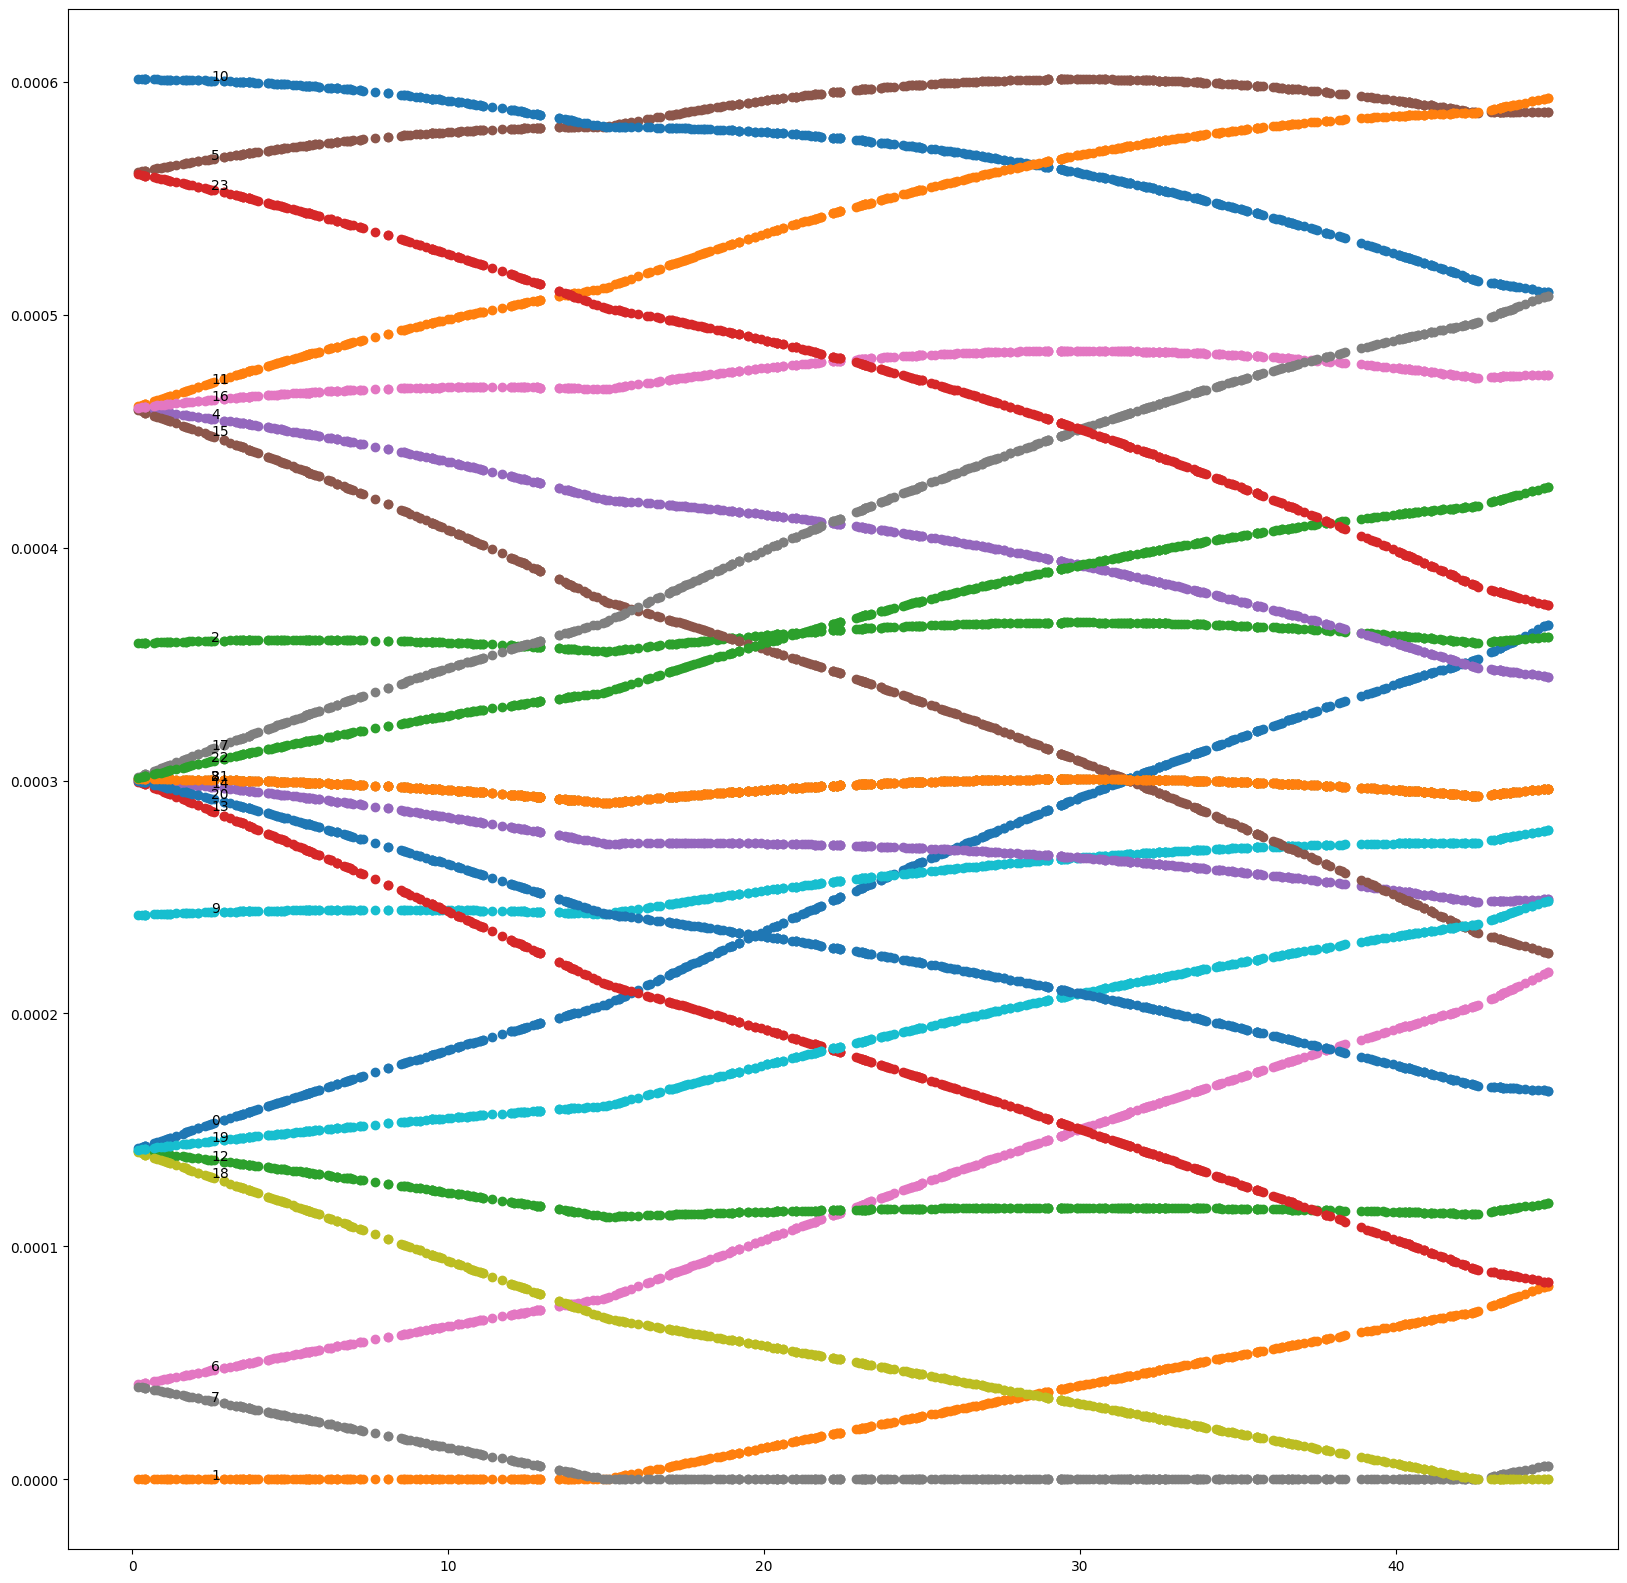

In [29]:
fig = plt.figure(figsize = (20,20))
ax = plt.axes()
for i in range(n_channels):
    ax.scatter(Y_data, X_data[:,i])
    ax.text(Y_data[-1], X_data[-1,i], '%s'%(str(i)))


In [143]:
indices = np.random.permutation(X_data.shape[0])
train_id, test_id = indices[:int(X_data.shape[0]*0.80)], indices[int(X_data.shape[0]*0.80):]
x_train, y_train, x_test, y_test = X_data[train_id,:], Y_data[train_id], X_data[test_id,:], Y_data[test_id]

In [144]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((400, 24), (400,), (100, 24), (100,))

In [176]:
x_train_2 = x_train[:, [1]]
y_train_2 = y_train
x_test_2 = x_test[:, [1]]
y_test_2 = y_test

In [178]:
x_train_2.shape

(400, 1)

In [189]:
x_train3 = []
y_train3 = []
for i in range(len(x_train_2)):
    if (y_train_2[i] > 15.0):
        x_train3.append(x_train_2[i])
        y_train3.append(y_train_2[i])
x_train3 = np.array(x_train3)
y_train3 = np.array(y_train3)

In [223]:
x_train3 *= 10000

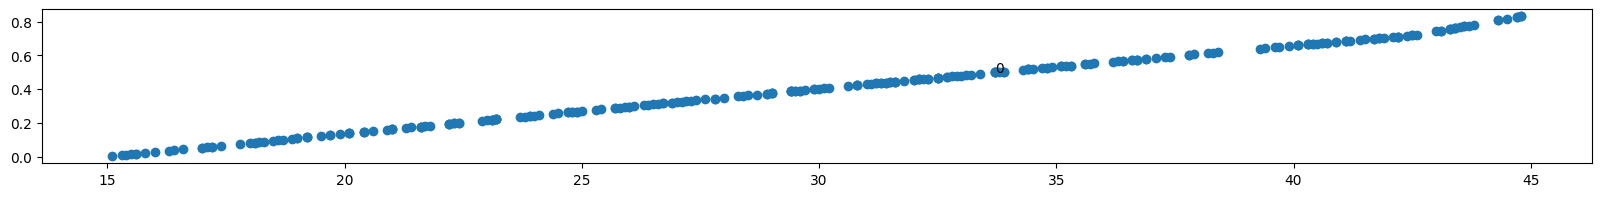

In [224]:
fig = plt.figure(figsize = (20,2))
ax = plt.axes()
for i in range(1):
    ax.scatter(y_train3, x_train3[:,i])
    ax.text(y_train3[-1], x_train3[-1,i], '%s'%(str(i)))


In [225]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(x_train3[0].shape),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation = 'linear')
])
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

In [226]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [227]:
losses = model.fit(x_train3, y_train3,
                   batch_size=5,
                   epochs=500)

Epoch 1/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 991.4596 - mae: 30.4737  
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 867.8027 - mae: 28.2844  
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 691.2919 - mae: 25.2088 
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 386.6557 - mae: 18.5721
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 104.3358 - mae: 9.0961
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 14.1972 - mae: 3.0931
Epoch 7/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0370 - mae: 2.2926 
Epoch 8/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 7.1174 - mae: 2.3135
Epoch 9/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 5.7419 - mae: 2.0425
Epoch 10/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 5.0621 - mae: 1.9456
Epoch 11/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6141 - mae: 1.8512 
Epoch 12/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0581 - mae: 1.6921 
Ep

In [229]:
model.predict(x_test_2*10000), y_test_2

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


(array([[14.735016],
        [28.075148],
        [38.57821 ],
        [17.50995 ],
        [30.265432],
        [14.735016],
        [35.441826],
        [14.735016],
        [14.735016],
        [19.354876],
        [37.541023],
        [14.735016],
        [32.138737],
        [14.735016],
        [35.441826],
        [30.562395],
        [30.661293],
        [24.956228],
        [14.735016],
        [43.217323],
        [33.214645],
        [37.256683],
        [24.855074],
        [17.304747],
        [14.735016],
        [14.735016],
        [17.715113],
        [27.273634],
        [23.334177],
        [14.735016],
        [14.735014],
        [14.735014],
        [14.735016],
        [38.765854],
        [40.967537],
        [14.735016],
        [14.735016],
        [14.735016],
        [14.735016],
        [43.932625],
        [16.48367 ],
        [14.735016],
        [14.735016],
        [16.894266],
        [21.399368],
        [33.50692 ],
        [20.48021 ],
        [14.7

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


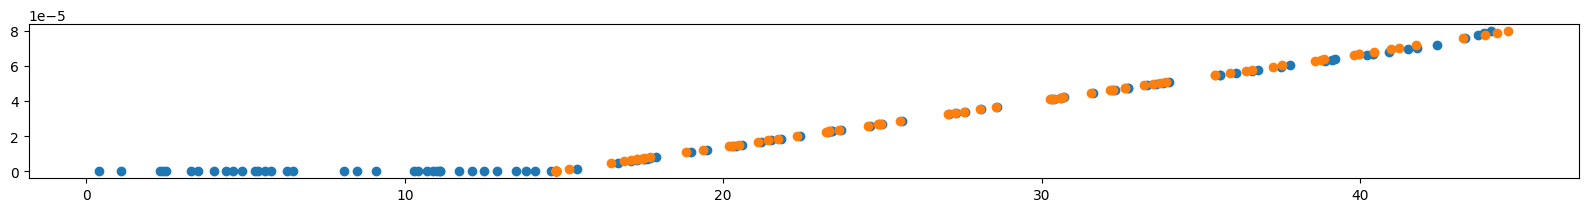

In [232]:
fig = plt.figure(figsize = (20,2))
ax = plt.axes()
for i in range(1):
    ax.scatter(y_test_2, x_test_2)
    ax.scatter(model.predict(x_test_2*10000), x_test_2)
    #ax.text(y_train3[-1], x_train3[-1,i], '%s'%(str(i)))
